In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#df = pd.read_csv()
#sns.countplot(x=column,data=df)
#df.isnull().sum()
#df[column].replace([some,things],[any,things],inplace=True)
#df[column].fillna(something,inpalce=True)
#df=df.astype(float) => df.info()
#df.describe()
#delete_columns = ['e', 'x', 'a', 'm', 'p', 'l', 'e']
#df.drop(delete_columns, axis=1, inplace=True)

In [2]:
combats = pd.read_csv('combats.csv')
combats

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [3]:
df = pd.read_csv('pokemon.csv')
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [4]:
pokemon_266_298 = df[df['#'].isin([266,298])]
pokemon_266_298

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
265,266,Larvitar,Rock,Ground,50,64,50,45,50,41,2,False
297,298,Nuzleaf,Grass,Dark,70,70,40,60,40,60,3,False


In [6]:
names_dict = dict(zip(df['#'],df["Name"]))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)
combats_name

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar
...,...,...,...
49995,Reshiram,Horsea,Reshiram
49996,Drilbur,Tynamo,Drilbur
49997,Pelipper,Zangoose,Zangoose
49998,Voltorb,Magnemite,Voltorb


In [8]:
names_dict = dict(zip(df['#'],df["Name"]))
names_dict

{1: 'Bulbasaur',
 2: 'Ivysaur',
 3: 'Venusaur',
 4: 'Mega Venusaur',
 5: 'Charmander',
 6: 'Charmeleon',
 7: 'Charizard',
 8: 'Mega Charizard X',
 9: 'Mega Charizard Y',
 10: 'Squirtle',
 11: 'Wartortle',
 12: 'Blastoise',
 13: 'Mega Blastoise',
 14: 'Caterpie',
 15: 'Metapod',
 16: 'Butterfree',
 17: 'Weedle',
 18: 'Kakuna',
 19: 'Beedrill',
 20: 'Mega Beedrill',
 21: 'Pidgey',
 22: 'Pidgeotto',
 23: 'Pidgeot',
 24: 'Mega Pidgeot',
 25: 'Rattata',
 26: 'Raticate',
 27: 'Spearow',
 28: 'Fearow',
 29: 'Ekans',
 30: 'Arbok',
 31: 'Pikachu',
 32: 'Raichu',
 33: 'Sandshrew',
 34: 'Sandslash',
 35: 'Nidoran♀',
 36: 'Nidorina',
 37: 'Nidoqueen',
 38: 'Nidoran♂',
 39: 'Nidorino',
 40: 'Nidoking',
 41: 'Clefairy',
 42: 'Clefable',
 43: 'Vulpix',
 44: 'Ninetales',
 45: 'Jigglypuff',
 46: 'Wigglytuff',
 47: 'Zubat',
 48: 'Golbat',
 49: 'Oddish',
 50: 'Gloom',
 51: 'Vileplume',
 52: 'Paras',
 53: 'Parasect',
 54: 'Venonat',
 55: 'Venomoth',
 56: 'Diglett',
 57: 'Dugtrio',
 58: 'Meowth',
 59: 'Per

In [9]:
#ポケモンの種族値の合計でグラフを見たい
df["stats_sum"] = df["HP"]+df["Attack"]+df["Defense"]+df["Sp. Atk"] + df["Sp. Def"] + df["Speed"]
print(df["stats_sum"].describe())

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: stats_sum, dtype: float64


<AxesSubplot:xlabel='stats_sum', ylabel='Density'>

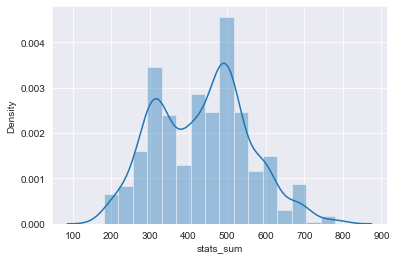

In [10]:
sns.distplot(df["stats_sum"])
#種族値が300と500がボリュームゾーンになっていることがうかがえる．

In [19]:
stats_sum_dict = dict(zip(df["#"],df["stats_sum"]))
stats_sum_dict
#dictコンストラクタは辞書型配列を作成する＝＞連想配列とも
#zip関数は要素をまとめる＝＞ここでは番号と名前をまとめている
#zip関数とdict関数を組み合わせることで辞書型配列を作成している

{1: 318,
 2: 405,
 3: 525,
 4: 625,
 5: 309,
 6: 405,
 7: 534,
 8: 634,
 9: 634,
 10: 314,
 11: 405,
 12: 530,
 13: 630,
 14: 195,
 15: 205,
 16: 395,
 17: 195,
 18: 205,
 19: 395,
 20: 495,
 21: 251,
 22: 349,
 23: 479,
 24: 579,
 25: 253,
 26: 413,
 27: 262,
 28: 442,
 29: 288,
 30: 438,
 31: 320,
 32: 485,
 33: 300,
 34: 450,
 35: 275,
 36: 365,
 37: 505,
 38: 273,
 39: 365,
 40: 505,
 41: 323,
 42: 483,
 43: 299,
 44: 505,
 45: 270,
 46: 435,
 47: 245,
 48: 455,
 49: 320,
 50: 395,
 51: 490,
 52: 285,
 53: 405,
 54: 305,
 55: 450,
 56: 265,
 57: 405,
 58: 290,
 59: 440,
 60: 320,
 61: 500,
 62: 305,
 63: 455,
 64: 350,
 65: 555,
 66: 300,
 67: 385,
 68: 510,
 69: 310,
 70: 400,
 71: 500,
 72: 590,
 73: 305,
 74: 405,
 75: 505,
 76: 300,
 77: 390,
 78: 490,
 79: 335,
 80: 515,
 81: 300,
 82: 390,
 83: 495,
 84: 410,
 85: 500,
 86: 315,
 87: 490,
 88: 590,
 89: 325,
 90: 465,
 91: 352,
 92: 310,
 93: 460,
 94: 325,
 95: 475,
 96: 325,
 97: 500,
 98: 305,
 99: 525,
 100: 310,
 101: 40

In [20]:
combats_stats_sum = combats[cols].replace(stats_sum_dict)
combats_stats_sum

,First_pokemon,Second_pokemon,Winner
0,300,340,340
1,580,580,580
2,405,485,485
3,250,485,485
4,495,505,495
...,...,...,...
49995,680,295,680
49996,328,275,328
49997,430,458,458
49998,330,325,330


In [21]:
cols

['First_pokemon', 'Second_pokemon', 'Winner']

<AxesSubplot:ylabel='Density'>

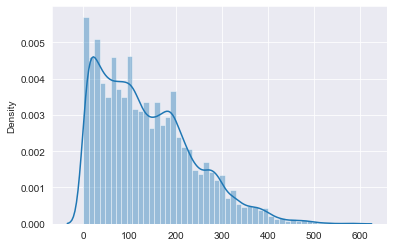

In [25]:
#Firstpokemonと#Secondpokemonのstastsの違いをグラフ化
diff_stats_sum = abs(combats_stats_sum["First_pokemon"]-combats_stats_sum["Second_pokemon"])
diff_stats_sum.describe()
sns.distplot(diff_stats_sum)

In [26]:
diff_stats_sum.describe()
#この結果から中央値が118だとわかり，対戦の50% において種族値が118以上離れている
#ここまでの思考として，種族値が高い方が試合に勝っているのかという疑問からこれらの図を作成している

count    50000.000000
mean       136.551440
std        101.221212
min          0.000000
25%         54.000000
50%        118.000000
75%        200.000000
max        590.000000
dtype: float64

count    50000.000000
mean        79.776320
std        150.093351
min       -562.000000
25%        -20.000000
50%         80.000000
75%        186.000000
max        590.000000
dtype: float64


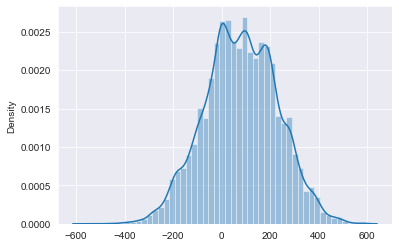

In [29]:
combats_stats_sum["Loser"] = combats_stats_sum.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] != x["Winner"] else x["Second_pokemon"],axis = 1)
diff_win_lose_stats = combats_stats_sum["Winner"] - combats_stats_sum["Loser"]
print(diff_win_lose_stats.describe())
sns.distplot(diff_win_lose_stats)
plt.show()

In [ ]:
stats_sum_dic_re = dict(zip(df["stats_sum"],df["#"]))
combats_stats_sum["diff"] = diff_win_lose_stats
superpassing_stats_sum = combats